># Banknote Authentication Data Set Analysis Using SVM Classifier On Orignal Data Set, and Data Set with Reduced Dimension Obtained Through PCA , LDA and T-SNE Technique & Analysing their Performance with ROC-AUC Curve.
>>##### By - Saif Ali Ahmad
Discription about dataset - Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.<br><br>
Attribute Information:-<br><br>
1.variance of Wavelet Transformed image (continuous) <br>
2.skewness of Wavelet Transformed image (continuous) <br>
3.curtosis of Wavelet Transformed image (continuous) <br>
4.entropy of image (continuous) <br>
5.class (integer) <br><br>

>URL for data set - https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

C:\Users\saif\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\saif\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Importing the Dataset

In [2]:
# importing the dataset 
doccument = pd.read_csv('data_banknote_authentication.csv')
# printing diamensions of dataset and first 5 rows of dataset
print('Diamensions of Given Data  =  ',doccument.shape)
doccument.head()

Diamensions of Given Data  =   (1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# checcking if any column has missing value
doccument.isnull().any()

Variance    False
Skewness    False
Curtosis    False
Entropy     False
Class       False
dtype: bool

In [4]:
# checking frequency of unique values in Class Column
doccument.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [5]:
# Checking the statistical overview of Dataset
doccument.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


>### Finding Corelation & Plotting the Corelation Matrix.
* Corelation tells about the relationship between different Variables/Features.
* Its value ranges from +1 to -1.
* If two Variables/Features are not related to each other then value of corelation will be close to zero.

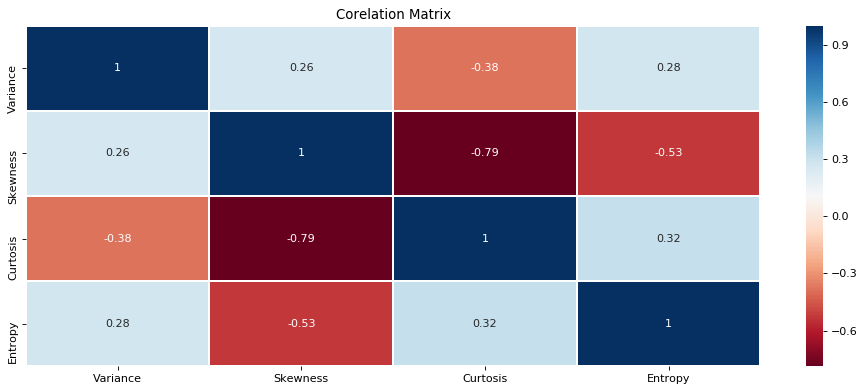

In [6]:
# Finding the Corelation
corr = doccument.drop(columns='Class').corr()

#Plotting the Corelation Matrix
f , ax = plt.subplots(figsize=(12,5),dpi=80)
sns.heatmap(corr,ax=ax,annot=True,cmap='RdBu',linecolor='white',linewidths='1')
ax.set_title('Corelation Matrix')
plt.tight_layout()

##  Dataset Preprocessing Part
>First we create the variables 'X' & 'y' containing feature columns and target label then we import 'shuffle' and 'train_test_split' for shuffling the data before splitting it into train and test part, after that train and test data is standardized.

In [7]:
# Creating the variables 'X' & 'y' containing feature columns and target label
X = doccument.iloc[:,:-1].values
y = doccument.iloc[:,-1].values

In [8]:
# Printing the variables X & y
print('X  =', X,'\n\n\n' , 'y  = ',y)

X  = [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] 


 y  =  [0 0 0 ... 1 1 1]


In [9]:
# Importing shuffle and train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=1)
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 ,random_state = 0 ) 

In [10]:
# standardizing the train test data with Sklearn's Standard Scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [11]:
# Checking Standardized X_train
X_train

array([[-0.62515254, -1.52180669,  0.96002109,  0.72363552],
       [-0.51848653, -1.30600831,  0.71398791,  0.90042563],
       [ 0.68167912, -1.47604416,  1.59149792,  0.36331863],
       ...,
       [ 0.05218705,  1.45248532, -0.67570253, -1.39417945],
       [ 0.84918351,  1.24759169, -1.15411682,  0.00547595],
       [-2.54448374,  1.21732718, -0.27485479, -1.58752737]])

# SVC Classifier

In [12]:
# importing the SVC classifier 
from sklearn.svm import SVC
SVC_classifier = SVC(kernel = 'rbf',C = 1,probability=True)
# fitting the training set with Classifier
SVC_classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
# Testing model performance
SVC_pred = SVC_classifier.predict(X_test)

In [14]:
# Testing Model performance with Confusion Matrix
from sklearn.metrics import confusion_matrix
SVC_cm = confusion_matrix(y_test,SVC_pred)
print('Confusion Matrix :- \n',SVC_cm)
print('Accuracy = ',(SVC_cm[0][0]+SVC_cm[1][1])/X_test.shape[0]*100)

Confusion Matrix :- 
 [[164   0]
 [  0 111]]
Accuracy =  100.0


In [15]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
SVC_accuracies = cross_val_score(estimator = SVC_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies = ',SVC_accuracies)
print('Mean Accuracy = ',SVC_accuracies.mean()*100,'%')
print('Standard Deviation =',SVC_accuracies.std())

Accuracies =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy =  100.0 %
Standard Deviation = 0.0


>#### Here we got 100% Accuracy with the SVM on the test set , Now we will try to reduce the diamension of the given dataset with Dimensionality Reduction Techniques .And then we will analyse the performance of SVM with Reduced Dataset.

>## P.C.A Dimensionality Reduduction.
>>The Dimensions of Orignal Data is reduced with the help of P.C.A (Principle Component Analysis).<br>
<br>
Dimensions Of Orignal Data = 4<br>
Dimensions Of Reduced Data = 2<br>
<br>
After reducing the data we analyze the performance of SVC Classifier on reduced data,<br>
and its performance is evaluated with the help of Confusion Matrix & K-Fold Cross Validation.<br>
<br>
Reduced 2D Data i.e PC-1 and PC-2 , is Plotted and Seperation between two Classes is observed.
<br>

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Percentage of Variance Across PC-1 & PC-2 = {:.2f}% ,{:.2f}%'.format(explained_variance[0]*100,explained_variance[1]*100))
# [54.46041383 32.71324559  8.60163934  4.22470124]

Percentage of Variance Across PC-1 & PC-2 = 54.46% ,32.71%


In [17]:
from sklearn.svm import SVC
pca_classifier = SVC(kernel='rbf',C=1,probability=True)
pca_classifier.fit(X_train_pca,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Testing model performance
pca_pred = pca_classifier.predict(X_test_pca)

In [19]:
# Testing Model performance with Confusion Matrix
from sklearn.metrics import confusion_matrix
pca_cm = confusion_matrix(y_test,pca_pred)
print('Confusion Matrix :- \n',pca_cm)
print('\nAccuracy = ',(pca_cm[0][0]+pca_cm[1][1])/275*100,'%')

Confusion Matrix :- 
 [[142  22]
 [ 27  84]]

Accuracy =  82.18181818181817 %


In [20]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
pca_accuracies = cross_val_score(estimator = pca_classifier, X = X_train_pca, y = y_train, cv = 10)
print('PCA Accuracies = ',pca_accuracies)
print('PCA Mean Accuracy = ',pca_accuracies.mean()*100,'%')
print('Standard Deviation =',pca_accuracies.std())

PCA Accuracies =  [0.86363636 0.86363636 0.75454545 0.85454545 0.75454545 0.80909091
 0.83636364 0.8        0.76146789 0.86111111]
PCA Mean Accuracy =  81.58942637383004 %
Standard Deviation = 0.04393698380574633


>#### Plotting the Data Set of Reduced Dimension after Applying P.C.A

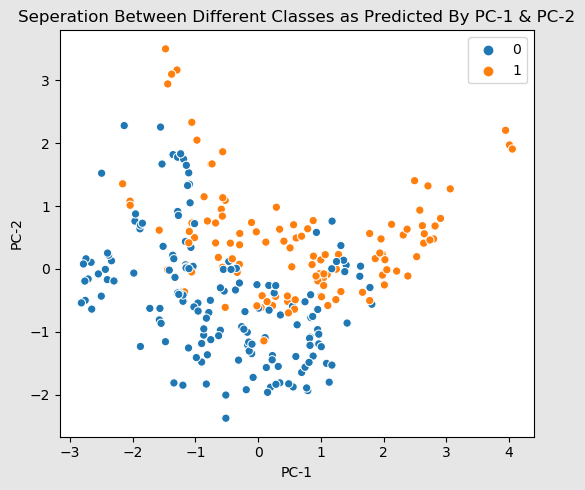

In [21]:
# Plotting 2D data obtained after applying PCA 
fig , axis = plt.subplots(nrows = 1 , ncols = 1 ,figsize =(6,5) , dpi = 100,facecolor='0.9')
sns.scatterplot(x = 'PC-1' ,y= 'PC-2' , hue=y_test , data = pd.DataFrame(X_test_pca , columns=['PC-1','PC-2']),ax = axis)
axis.set_title('Seperation Between Different Classes as Predicted By PC-1 & PC-2')
fig
plt.legend()
plt.tight_layout()

>## LDA Dimensionality Reduduction
>>The Dimensions of Orignal Data is reduced with the help of LDA (Linear Discriminant Analysis).<br>
<br>
Note :- The n_components parameters of LDA assumes the value one less than Total Number Of Classes<br>
        i.e - n_components < (n_classes - 1) <br>    
<br>
Dimensions Of Orignal Data = 4<br>
Dimensions Of Reduced Data = 1<br>
<br>
After reducing the data we analyze the performance of SVC Classifier on reduced data,<br>
and its performance is evaluated with the help of Confusion Matrix & K-Fold Cross Validation.<br>
<br>
Reduced One Dimensional data i.e LDA-1 , is Plotted and Seperation between two Classes is observed.
<br>

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda  = lda.transform(X_test)

In [23]:
from sklearn.svm import SVC
lda_classifier = SVC(kernel = 'rbf',C=1,probability=True)
lda_classifier.fit(X_train_lda,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# Testing model performance
lda_pred = lda_classifier.predict(X_test_lda)

In [25]:
# Testing Model performance with Confusion Matrix
from sklearn.metrics import confusion_matrix
lda_cm = confusion_matrix(y_test,lda_pred)
print('Confusion Matrix :- \n',lda_cm)
print('\nAccuracy = ',(lda_cm[0][0]+lda_cm[1][1])/275*100,'%')

Confusion Matrix :- 
 [[163   1]
 [  2 109]]

Accuracy =  98.9090909090909 %


In [26]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
lda_accuracies = cross_val_score(estimator = lda_classifier, X = X_train_lda, y = y_train, cv = 10)
print('LDA Accuracies = ',lda_accuracies)
print('LDA Mean Accuracy = ',lda_accuracies.mean()*100,'%')
print('Standard Deviation =',pca_accuracies.std())

LDA Accuracies =  [1.         0.99090909 0.98181818 0.98181818 0.96363636 0.99090909
 1.         0.97272727 0.99082569 0.99074074]
LDA Mean Accuracy =  98.63384610632316 %
Standard Deviation = 0.04393698380574633


>#### Plotting the Data Set of Reduced Dimension i.e One Dimension after Applying LDA

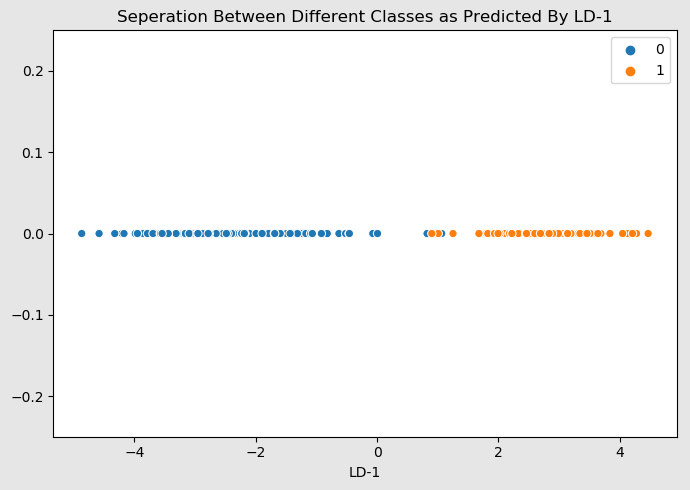

In [27]:
# Plotting One Diamensional data obtained after applying PCA 
fig , axis = plt.subplots(nrows = 1 , ncols = 1 ,figsize =(7,5) , dpi = 100,facecolor='0.9')
sns.scatterplot(x = 'LD-1' ,y= 0, hue=y_test , data = pd.DataFrame(X_test_lda , columns=['LD-1']) , ax=axis)
axis.set_title('Seperation Between Different Classes as Predicted By LD-1')
axis.set_ylim([-0.25,0.25])
fig
plt.legend()
plt.tight_layout()

>## T-SNE Dimensionality Reduduction
>>The Dimensions of Orignal Data is reduced with the help of T-SNE (T-Distributed Stochastic Neighbour Embedding).<br>
<br>
Dimensions Of Orignal Data = 4<br>
Dimensions Of Reduced Data = 2<br>
<br>
After reducing the data we analyze the performance of SVC Classifier on reduced data,<br>
and its performance is evaluated with the help of Confusion Matrix & K-Fold Cross Validation.<br>
<br>
Reduced 2D Data i.e T-SNE-1 and T-SNE-2 , is Plotted and Seperation between two Classes is observed.
<br>

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne_X = tsne.fit_transform(X)

In [29]:
tsne_X

array([[ 38.377712  ,   3.977226  ],
       [-17.897331  ,  -0.74783844],
       [ -2.0361006 ,  49.22137   ],
       ...,
       [ 50.99311   ,  -0.3191925 ],
       [-20.15968   ,   6.7608438 ],
       [ 42.166622  ,   4.0823245 ]], dtype=float32)

In [30]:
from sklearn.model_selection import train_test_split
X_train_tsne , X_test_tsne , y_train_tsne , y_test_tsne = train_test_split(tsne_X , y ,test_size = 0.2 ,random_state = 0 ) 

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_tsne = sc.fit_transform(X_train_tsne)
X_test_tsne  = sc.transform(X_test_tsne)

In [32]:
from sklearn.svm import SVC
tsne_classifier = SVC(kernel = 'rbf',C=1,probability=True)
tsne_classifier.fit(X_train_tsne,y_train_tsne)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
# Testing model performance
tsne_pred = tsne_classifier.predict(X_test_tsne)

In [34]:
# Testing Model performance with Confusion Matrix
from sklearn.metrics import confusion_matrix
tsne_cm = confusion_matrix(y_test_tsne,tsne_pred)
print('Confusion Matrix :- \n',tsne_cm)
print('\nAccuracy = ',(tsne_cm[0][0]+tsne_cm[1][1])/275*100,'%')

Confusion Matrix :- 
 [[159   5]
 [  0 111]]

Accuracy =  98.18181818181819 %


In [35]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
tsne_accuracies = cross_val_score(estimator = tsne_classifier, X = X_train_tsne, y = y_train_tsne, cv = 10)
print('T-SNE Accuracies = ',tsne_accuracies)
print('T-SNE Mean Accuracy = ',tsne_accuracies.mean()*100,'%')
print('Standard Deviation =',tsne_accuracies.std())

T-SNE Accuracies =  [1.         1.         0.98181818 0.99090909 0.99090909 0.97272727
 1.         1.         1.         1.        ]
T-SNE Mean Accuracy =  99.36363636363637 %
Standard Deviation = 0.009136250564655342


>#### Plotting the Data Set of Reduced Dimension After Applying T-SNE

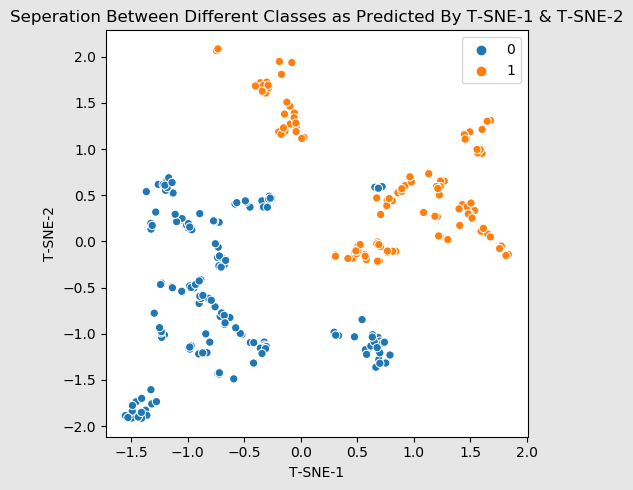

In [36]:
# Plotting 2D data obtained after applying PCA
fig , axis = plt.subplots(nrows = 1 , ncols = 1 ,figsize =(6,5) , dpi = 100,facecolor='0.9')
sns.scatterplot(x = 'T-SNE-1' ,y= 'T-SNE-2' , hue=y_test , data=pd.DataFrame(X_test_tsne,columns=['T-SNE-1','T-SNE-2']),ax=axis)
axis.set_title('Seperation Between Different Classes as Predicted By T-SNE-1 & T-SNE-2')
fig
plt.legend()
plt.tight_layout()

# Plotting ROC-AUC curve for SVC Classification Models .
>ROC curve of SVC models with Orignal Data & Reduced Data is plotted and AUC is calculated and displayed in the graph for evaluation of performance of the models.

In [37]:
# Calculating the predicted value in terms of Probability
y_svc_prob  = SVC_classifier.predict_proba(X_test)[::,1]
y_pca_prob  = pca_classifier.predict_proba(X_test_pca)[::,1]
y_lda_prob  = lda_classifier.predict_proba(X_test_lda)[::,1]
y_tsne_prob = tsne_classifier.predict_proba(X_test_tsne)[::,1]

# Printing the shape of predicted probable values
print('y_svc_prob  shape : ',y_svc_prob.shape)
print('y_pca_prob  shape : ',y_pca_prob.shape)
print('y_lda_prob  shape : ',y_lda_prob.shape)
print('y_tsne_prob shape : ',y_tsne_prob.shape)

y_svc_prob  shape :  (275,)
y_pca_prob  shape :  (275,)
y_lda_prob  shape :  (275,)
y_tsne_prob shape :  (275,)


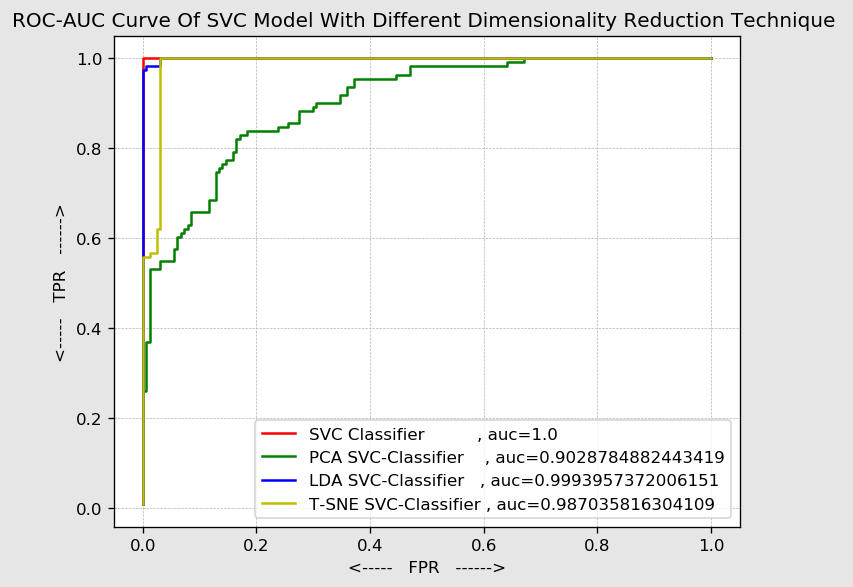

In [38]:
from sklearn import metrics

# Calculating FPR & TPR
svc_fpr,svc_tpr,_   = metrics.roc_curve(y_test,y_svc_prob)
pca_fpr,pca_tpr,_   = metrics.roc_curve(y_test,y_pca_prob)
lda_fpr,lda_tpr,_   = metrics.roc_curve(y_test,y_lda_prob)
tsne_fpr,tsne_tpr,_ = metrics.roc_curve(y_test,y_tsne_prob)

# Calculating AUC of different models
svc_auc   = metrics.roc_auc_score(y_test,y_svc_prob)
pca_auc   = metrics.roc_auc_score(y_test,y_pca_prob)
lda_auc   = metrics.roc_auc_score(y_test,y_lda_prob)
tsne_auc  = metrics.roc_auc_score(y_test,y_tsne_prob)

# Plotting the ROC curve and displaying AUC 
fig , axes = plt.subplots(nrows = 1 , ncols = 1,figsize = (7,5) , dpi = 120,facecolor='0.9')
axes.plot(svc_fpr,svc_tpr,'r',label='SVC Classifier          , auc='+str(svc_auc))
axes.plot(pca_fpr,pca_tpr,'g',label='PCA SVC-Classifier    , auc='+str(pca_auc))
axes.plot(lda_fpr,lda_tpr,'b',label='LDA SVC-Classifier   , auc='+str(lda_auc))
axes.plot(tsne_fpr,tsne_tpr,'y',label='T-SNE SVC-Classifier , auc='+str(tsne_auc))

axes.set_title('ROC-AUC Curve Of SVC Model With Different Dimensionality Reduction Technique ')
axes.set_xlabel('<-----   FPR   ------>')
axes.set_ylabel('<-----   TPR   ------>')
axes.grid(linestyle='--', linewidth=0.4)

plt.tight_layout()
plt.legend()
plt.show()

># Conclusion -
>>First we analysed the given dataset with SVM model , Here we got 100% Accuracy with the Test Set.<br>
<br>
After that we used the Dimensionality Reduction Techniques i.e PCA , LDA & T-SNE to reduce the Diamension of the given dataset. And then we analysed the performance of the SVM model on the Reduced Data set.<br>
<br>
Then we plotted the ROC-AUC curve for SVM models of PCA , LDA & T-SNE , and calculated their AUC Score respectively.<br>
<br>
Performance of LDA was best followed by T-SNE having AUC score of 0.999 & 0.987 respectively,<br>
PCA had a AUC score of 0.902 , which is low compare to T-SNE & LDA.

